In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from ucimlrepo import fetch_ucirepo 
import math
from sklearn.pipeline import Pipeline, make_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
%%matplotlib inline

UsageError: Line magic function `%%matplotlib` not found.


In [4]:
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

In [5]:

# variable information 
bike_sharing.variables

,name,role,type,demographic,description,units,missing_values
0,instant,ID,Integer,None,record index,None,no
1,dteday,Feature,Date,None,date,None,no
2,season,Feature,Categorical,None,"1:winter, 2:spring, 3:summer, 4:fall",None,no
3,yr,Feature,Categorical,None,"year (0: 2011, 1: 2012)",None,no
4,mnth,Feature,Categorical,None,month (1 to 12),None,no
5,hr,Feature,Categorical,None,hour (0 to 23),None,no
6,holiday,Feature,Binary,None,weather day is holiday or not (extracted from ...,None,no
7,weekday,Feature,Categorical,None,day of the week,None,no
8,workingday,Feature,Binary,None,"if day is neither weekend nor holiday is 1, ot...",None,no
9,weathersit,Feature,Categorical,None,"- 1: Clear, Few clouds, Partly cloudy, Partly ...",None,no


In [6]:
bike_sharing.data.features.isna().sum().sort_values(ascending=True)

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

In [7]:
X.dteday = pd.to_datetime(X.dteday)
X['season'] = X.season.astype('category')
X['holiday'] = X.holiday.astype('category')
X['weekday'] = X.weekday.astype('category')
X['weathersit'] = X.weathersit.astype('category')
X['workingday'] = X.workingday.astype('category')
X['mnth'] = X.mnth.astype('category')
X['yr'] = X.yr.astype('category')
X['hr'] = X.hr.astype('category')

C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_16744\2491657531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dteday = pd.to_datetime(X.dteday)
C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_16744\2491657531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['season'] = X.season.astype('category')
C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_16744\2491657531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

<Axes: >

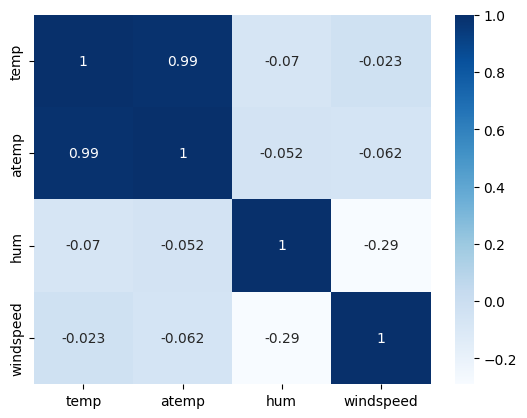

In [8]:
sns.heatmap(X.corr(numeric_only=True), annot=True, cmap='Blues')

In [9]:
X.drop('atemp', axis=1, inplace=True)


C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_16744\2524671919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('atemp', axis=1, inplace=True)


In [10]:
numeric_X = X.select_dtypes(include=np.number).columns.to_list()
numeric_X
cat_X = X.select_dtypes(include='category').columns.to_list()
cat_X

['temp', 'hum', 'windspeed']

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

In [36]:
num_pipe = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')),
                           ('scale', MinMaxScaler())
                          ])

cat_pipe = Pipeline(steps = [
    ('oneH', OneHotEncoder(sparse_output=False))
])

In [37]:
column_transformer = ColumnTransformer(transformers=[
    ('cat_trans', cat_pipe, cat_X),
    ('num_trans', num_pipe, numeric_X)
], remainder='drop', n_jobs=-1)

In [44]:
pipeline = Pipeline(steps=[
    ('col_transformer', column_transformer),
    ('randomF', RandomForestRegressor())
])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12165, 12), (5214, 12), (12165, 1), (5214, 1))

In [45]:
pipeline

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cat_trans',
                                                  Pipeline(steps=[('oneH',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday',
                                                   'weathersit']),
                                                 ('num_trans',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'hum',
                                                   'windspeed'])])),
                ('randomF', RandomForestRegressor())])

In [46]:
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print(f"Model score: {score}") # model accuracy

C:\Users\EdwinVivekN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cat_trans',
                                                  Pipeline(steps=[('oneH',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday',
                                                   'weathersit']),
                                                 ('num_trans',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'hum',
                                                   'windspeed'])])),
                ('randomF', RandomForestRegressor())])

Model score: 0.9270695902054241


In [47]:
pred = pipeline.predict(x_test)
print(math.sqrt(mean_squared_error(y_test,pred)))

47.99930169084703


In [49]:
column_transformer.set_output(transform='pandas')
df = column_transformer.fit_transform(x_train, y_train)
df

ColumnTransformer(n_jobs=-1,
                  transformers=[('cat_trans',
                                 Pipeline(steps=[('oneH',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['season', 'yr', 'mnth', 'hr', 'holiday',
                                  'weekday', 'workingday', 'weathersit']),
                                ('num_trans',
                                 Pipeline(steps=[('imp', SimpleImputer()),
                                                 ('scale', MinMaxScaler())]),
                                 ['temp', 'hum', 'windspeed'])])

,cat_trans__season_1,cat_trans__season_2,cat_trans__season_3,cat_trans__season_4,cat_trans__yr_0,cat_trans__yr_1,cat_trans__mnth_1,cat_trans__mnth_2,cat_trans__mnth_3,cat_trans__mnth_4,...,cat_trans__weekday_6,cat_trans__workingday_0,cat_trans__workingday_1,cat_trans__weathersit_1,cat_trans__weathersit_2,cat_trans__weathersit_3,cat_trans__weathersit_4,num_trans__temp,num_trans__hum,num_trans__windspeed
11229,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.489796,0.42,0.228047
6334,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.673469,0.79,0.193018
11060,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.326531,0.36,0.491243
12346,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.693878,0.34,0.000000
15437,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.551020,0.52,0.350888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.448980,0.88,0.105325
11964,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.653061,0.34,0.157870
5390,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.795918,0.43,0.333373
860,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.224490,0.65,0.491243


In [52]:
#Hyperparameter tuning
pipeline.get_params()

{'memory': None,
 'steps': [('col_transformer', ColumnTransformer(n_jobs=-1,
                     transformers=[('cat_trans',
                                    Pipeline(steps=[('oneH',
                                                     OneHotEncoder(sparse_output=False))]),
                                    ['season', 'yr', 'mnth', 'hr', 'holiday',
                                     'weekday', 'workingday', 'weathersit']),
                                   ('num_trans',
                                    Pipeline(steps=[('imp', SimpleImputer()),
                                                    ('scale', MinMaxScaler())]),
                                    ['temp', 'hum', 'windspeed'])])),
  ('randomF', RandomForestRegressor(ccp_alpha=1))],
 'verbose': False,
 'col_transformer': ColumnTransformer(n_jobs=-1,
                   transformers=[('cat_trans',
                                  Pipeline(steps=[('oneH',
                                                   OneHotEnco

In [55]:
pipeline.set_params(randomF__ccp_alpha = 0)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cat_trans',
                                                  Pipeline(steps=[('oneH',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday',
                                                   'weathersit']),
                                                 ('num_trans',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'hum',
                                                   'windspeed'])])),
                ('randomF', RandomForestRegressor(ccp_alpha=0))])

In [54]:
from sklearn.model_selection import GridSearchCV

grid_params = {'randomF__ccp_alpha' : [0,1],
               'randomF__max_features': [1.0, 2.0]
              }


gs = GridSearchCV(pipeline, grid_params, cv=5)
gs.fit(x_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(x_test,y_test)))

C:\Users\EdwinVivekN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\EdwinVivekN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\EdwinVivekN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('cat_trans',
                                                                         Pipeline(steps=[('oneH',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit']),
                                                                        ('num_trans',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         ['temp',
                                                                          'hum',
                                                                          'windspeed'])])),
                                       ('randomF',
                                        RandomForestRegressor(ccp_alpha=1))]),
             param_grid={'randomF__ccp_alpha': [0, 1],
                         'randomF__max_features': [1.0, 2.0]})

Best Score of train set: 0.9139835300197529
Best parameter set: {'randomF__ccp_alpha': 0, 'randomF__max_features': 1.0}
Test Score: 0.9275585537463824


In [56]:
#prediction
def score(lead_features: pd.DataFrame) -> np.ndarray:
    return pipeline.predict(lead_features)

import modelbit
mb = modelbit.login()


In [57]:
mb.deploy(score)

Encrypting 'pipeline': 107MB [00:00, 127MB/s]                                                                          
Uploading 'pipeline': 100%|███████████████████████████████████████████████████████| 18.0M/18.0M [00:08<00:00, 2.15MB/s]


In [74]:
modelbit.get_inference(
  region="ap-south-1",
  workspace="edwinvivek",
  deployment="score",
  data=x_test.loc[[0]].values.reshape(-1,1)
)

Traceback (most recent call last):
  File "/tmp/runtime/modelbit_deployment_runtime.py", line 275, in grpcHandler
    outputRows = loadStateAndInvokeRuntime(apiHandler)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/runtime/modelbit_deployment_runtime.py", line 330, in loadStateAndInvokeRuntime
    outputRows = runMainFunc(apiHandler, inputRows)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/runtime/modelbit_deployment_runtime.py", line 381, in runMainFunc
    return runEachRow(apiHandler, source, inputRows)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/runtime/modelbit_deployment_runtime.py", line 392, in runEachRow
    result = resolveResult(source.__dict__[mainFuncName](*iRow[1:]))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: score() missing 1 required positional argument: 'lead_features'


ModelbitError: TypeError: score() missing 1 required positional argument: 'lead_features'

In [ ]:
#Feature union
#Caching

In [73]:
x_test.loc[[0]].values.reshape(-1,1)

array([[Timestamp('2011-01-01 00:00:00')],
       [1],
       [0],
       [1],
       [0],
       [0],
       [6],
       [0],
       [1],
       [0.24],
       [0.81],
       [0.0]], dtype=object)